In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#generating dataset
N = 1000
X = np.random.random((N,2)) * 6-3
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:, 1])

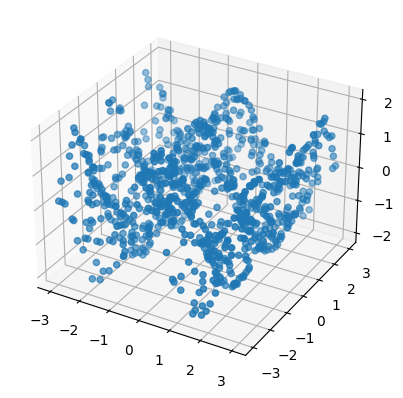

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], Y)

In [4]:
#Build the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape = (2,), activation = 'relu'),
        tf.keras.layers.Dense(1)
        ])

In [5]:
#Compile and fit the model
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer= opt, loss = 'mse')
r = model.fit(X, Y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.0147
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9774
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9283
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9165
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8641
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8474
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7849
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7039
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6918
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6336
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5656
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5552
Epoch 13/100
32/32 [=================

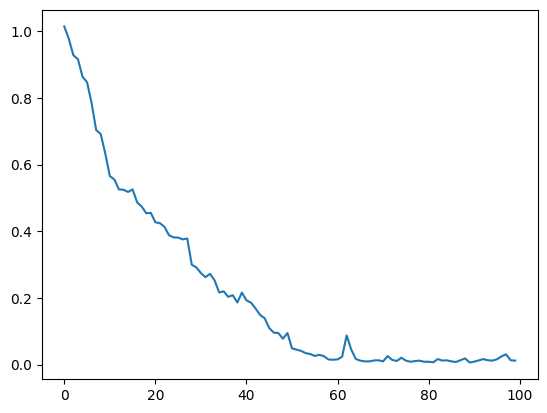

In [6]:
#plot the loss
plt.plot(r.history['loss'], label = 'loss')

79/79 [==============================] - 0s 1ms/step


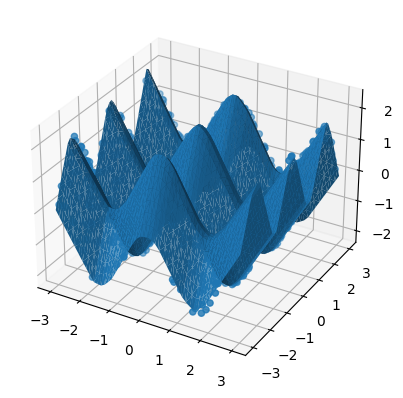

In [7]:
#plot the predection surface
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)
#surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
# prepairing xx and yy in correct format first by using flatten() data will be flatten and in vstack they will be stored verticaly
# and by using T data will be transposed
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat)
plt.show()